# Gathering of Hospital, Long-Term Care, Medical Facilities, DUI and/or Domestic Violence Treatment Centers, Pharmacy, Drug Drop Off Locations
Maddie Warndorf

## Hospital, Long-Term Care, Medical Facilities, DUI and/or Domestic Violence Treatment Centers

Shows Arizona health, child care, and radiation control facilities as of October 2019.
https://www.arcgis.com/home/item.html?id=5e764d6e640b4226ae7c0bba27f7b9f0&view=table&showFilters=false#data

AZLicensedFacilities (FeatureServer) Services Directory Repository: https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/AZLicensedFacilities/FeatureServer

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pickle as pkl
from descartes import PolygonPatch

import requests
import pandas as pd
import feedparser
from bs4 import BeautifulSoup
import urllib.request
import urllib3
import json
from pandas.io.json import json_normalize

### Hospitals

Queried JSON File from Hospital Layer found in AZLicensedFacilities (FeatureServer) Services Directory Repository

https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/AZLicensedFacilities/FeatureServer/0/query?where=P_city+%3D+%27TEMPE%27&objectIds=&time=&geometry=&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=true&outFields=*&returnGeometry=false&featureEncoding=esriDefault&multipatchOption=none&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=true&returnM=true&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token=

In [200]:
url ='https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/AZLicensedFacilities/FeatureServer/0/query?where=P_city+%3D+%27TEMPE%27&objectIds=&time=&geometry=&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=true&outFields=*&returnGeometry=false&featureEncoding=esriDefault&multipatchOption=none&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=true&returnM=true&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='
resp = requests.get(url)
print(resp)

data_raw = resp.json()
data_raw.keys()

data_raw['features']
h_data = pd.io.json.json_normalize(data_raw['features'])
h_data.head()

<Response [200]>


,attributes.Bureau,attributes.Capacity,attributes.Category,attributes.FACID,attributes.FaxPhone,attributes.GeoID,attributes.GeoIDx,attributes.Hospital_Group_License,attributes.Icon_Category,attributes.IncidentID,...,attributes.SUBTYPE,attributes.TYPE,attributes.Telephone,attributes.X_Is_Facility,attributes.X_Is_Public,attributes.legalname,attributes.license_expiration,attributes.mail_city,attributes.mail_zip,attributes.rundate
0,MED,74,Hospital,MED3833,(480)784-5539,g3443,g3443,None,HOSPITAL,fMED3833,...,SHORT TERM,HOSPITAL,(480)784-5500,Yes,Yes,"TEMPE ST LUKE'S HOSPITAL, A CAMPUS OF ST LUKE'...",None,TEMPE,85281.0,1569888000000
1,MED,138,Hospital,MED4271,(480)345-5450,g5325,g5325,None,HOSPITAL,fMED4271,...,PSYCHIATRIC,HOSPITAL,(480)345-5400,Yes,Yes,AURORA BEHAVIORAL HEALTHCARE-TEMPE,None,None,NaN,1569888000000


In [201]:
desired_cols = ['attributes.Name','attributes.TYPE',
               'attributes.SUBTYPE','attributes.Icon_Category',
               'attributes.Capacity','attributes.P_city',
               'attributes.P_zip','attributes.N_LAT',
               'attributes.N_LON']

h_df = h_data[desired_cols]

h_df.columns =['Name','Type','Subtype','Category','Capacity','City',
                'Zip','Lat','Lon']
h_df.head()

,Name,Type,Subtype,Category,Capacity,City,Zip,Lat,Lon
0,"TEMPE ST LUKE'S HOSPITAL, A CAMPUS OF ST LUKE'...",HOSPITAL,SHORT TERM,HOSPITAL,74,TEMPE,85281,33.412378,-111.940084
1,AURORA BEHAVIORAL HEALTHCARE-TEMPE,HOSPITAL,PSYCHIATRIC,HOSPITAL,138,TEMPE,85283,33.364115,-111.938600


In [202]:
crs = {'init': 'epsg:4326'}
tempe_h = pd.DataFrame(h_df)

geometry = [Point(xy) for xy in zip(tempe_h['Lon'],tempe_h['Lat'])]
geometry[:3]

geo_h = gpd.GeoDataFrame(tempe_h, crs = crs, geometry = geometry)

In [184]:
with open('hospitalsTempe.pkl', 'wb') as pkl_file:
    pkl.dump(geo_h, pkl_file)

In [20]:
crs = {'init': 'epsg:4326'}
turl = 'https://services.arcgis.com/lQySeXwbBg53XWDi/arcgis/rest/services/City_Boundary/FeatureServer/0/query?where=OBJECTID+%3E+0+&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token='
bdry = gpd.read_file(turl)
bdry

,OBJECTID,CityName,Shape_STArea__,Shape_STLength__,Shape__Area,Shape__Length,geometry
0,1,Tempe,1.115509e+09,226714.153922,1.115378e+09,226722.93386,"POLYGON ((-111.93930 33.46531, -111.93931 33.4..."


In [38]:
surl = 'https://services.arcgis.com/lQySeXwbBg53XWDi/arcgis/rest/services/Wastewater_Study_Areas/FeatureServer/0/query?where=OBJECTID+%3E+0+&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token='
sa = gpd.read_file(surl)

In [203]:
casesh = list(geo_h['Category'])
casesh = list(np.unique(casesh))

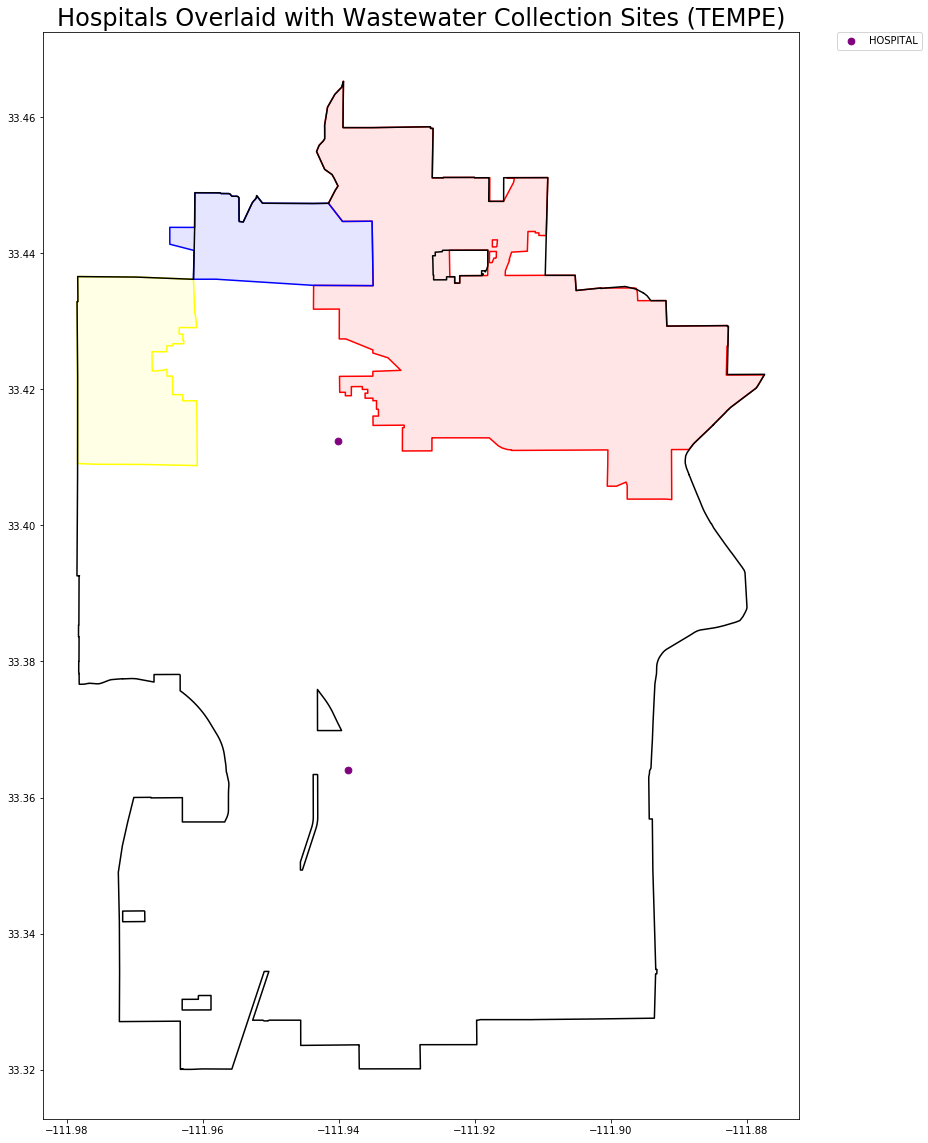

In [204]:
%matplotlib inline 
markers = ['o',
          'v',
          '^',
          '<',
          '>',
          '8',
          's',
          'p',
          '*',
          'h',
          'X']

fig, ax = plt.subplots(figsize=(20,20))
plt.title('Hospitals Overlaid with Wastewater Collection Sites (TEMPE)', size = 24)
for i in range(len(casesh)):
    geo_h[geo_h['Category']==casesh[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesh[i]),
                                             color='purple')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
sa[sa['Site'] == 'TP02'].plot(ax=ax,color='red',alpha=0.1)
sa[sa['Site'] == 'TP02'].boundary.plot(ax=ax,color='red')
sa[sa['Site'] == 'TP04'].plot(ax=ax, color = 'yellow',alpha=0.1)
sa[sa['Site'] == 'TP04'].boundary.plot(ax=ax, color = 'yellow')
sa[sa['Site'] == 'TP05'].plot(ax=ax, color = 'blue',alpha=0.1)
sa[sa['Site'] == 'TP05'].boundary.plot(ax=ax, color = 'blue')
bdry.boundary.plot(ax=ax, color='black')

### Long-Term Care

Queried JSON File from Long-Term Care Layer found in AZLicensedFacilities (FeatureServer) Services Directory Repository
https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/AZLicensedFacilities/FeatureServer/1/query?where=P_city+%3D+%27TEMPE%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token=

In [205]:
url = 'https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/AZLicensedFacilities/FeatureServer/1/query?where=P_city+%3D+%27TEMPE%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='
resp = requests.get(url)
print(resp)

data_raw = resp.json()
data_raw.keys()

data_raw['features']
lt_data = pd.io.json.json_normalize(data_raw['features'])
lt_data.head()

lt_df = lt_data[desired_cols]

lt_df.columns =['Name','Type','Subtype','Category','Capacity','City',
                'Zip','Lat','Lon']

tempe_lt = pd.DataFrame(lt_df)

geometry = [Point(xy) for xy in zip(tempe_lt['Lon'],tempe_lt['Lat'])]
geometry[:3]

geo_lt = gpd.GeoDataFrame(tempe_lt, crs = crs, geometry = geometry)

<Response [200]>


In [186]:
with open('longtermcareTempe.pkl', 'wb') as pkl_file:
    pkl.dump(geo_lt, pkl_file)

In [206]:
casesl = list(geo_lt['Category'])

casesl = list(np.unique(casesl))

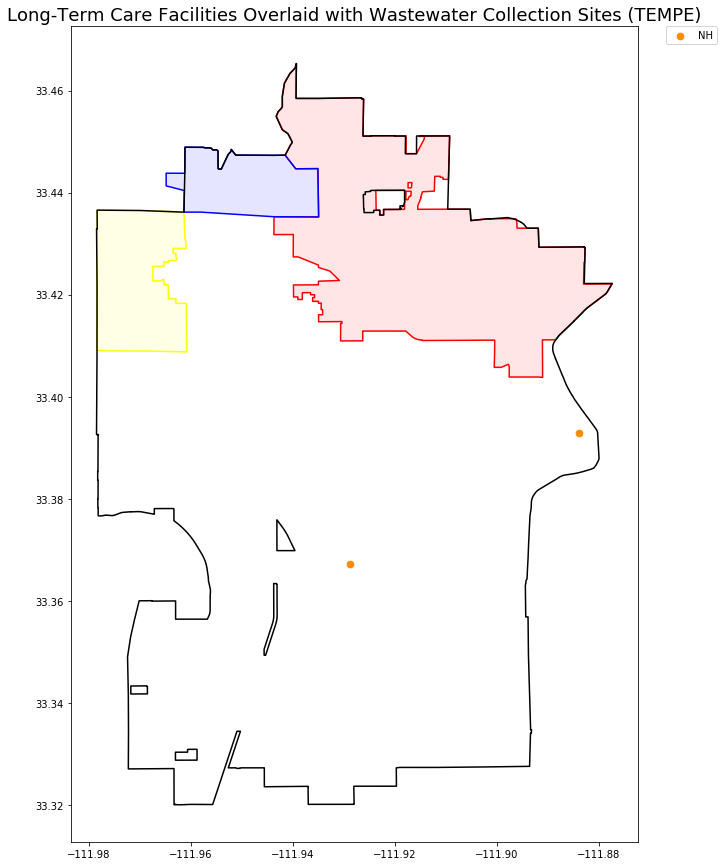

In [207]:
fig, ax = plt.subplots(figsize=(15,15))
plt.title('Long-Term Care Facilities Overlaid with Wastewater Collection Sites (TEMPE)', size = 18)
for i in range(len(casesl)):
    geo_lt[geo_lt['Category']==casesl[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesl[i]),
                                             color='darkorange')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
sa[sa['Site'] == 'TP02'].plot(ax=ax,color='red',alpha=0.1)
sa[sa['Site'] == 'TP02'].boundary.plot(ax=ax,color='red')
sa[sa['Site'] == 'TP04'].plot(ax=ax, color = 'yellow',alpha=0.1)
sa[sa['Site'] == 'TP04'].boundary.plot(ax=ax, color = 'yellow')
sa[sa['Site'] == 'TP05'].plot(ax=ax, color = 'blue',alpha=0.1)
sa[sa['Site'] == 'TP05'].boundary.plot(ax=ax, color = 'blue')
bdry.boundary.plot(ax=ax, color='black')

### Medical Facility

Queried JSON File from Medical Facility Layer found in AZLicensedFacilities (FeatureServer) Services Directory Repository

https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/AZLicensedFacilities/FeatureServer/2/query?where=P_city+%3D+%27TEMPE%27&objectIds=&time=&geometry=&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=102100&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token=

In [1]:
import requests
import pandas as pd
import feedparser
from bs4 import BeautifulSoup
import urllib.request
import urllib3
import json
from pandas.io.json import json_normalize

In [208]:
url = 'https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/AZLicensedFacilities/FeatureServer/2/query?where=P_city+%3D+%27TEMPE%27&objectIds=&time=&geometry=&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=102100&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='
resp = requests.get(url)
print(resp)

data_raw = resp.json()
data_raw.keys()

<Response [200]>


dict_keys(['objectIdFieldName', 'uniqueIdField', 'globalIdFieldName', 'geometryType', 'spatialReference', 'fields', 'features'])

In [209]:
data_raw['features']
mf_data = pd.io.json.json_normalize(data_raw['features'])
mf_data.head()

#print(mf_data.columns)

desired_cols = ['attributes.Name','attributes.TYPE',
               'attributes.SUBTYPE','attributes.Icon_Category',
               'attributes.Capacity','attributes.P_city',
               'attributes.P_zip','attributes.N_LAT',
               'attributes.N_LON']

mf_df = mf_data[desired_cols]

mf_df.columns =['Name','Type','Subtype','Category','Capacity','City',
                'Zip','Lat','Lon']
mf_df.head()

,Name,Type,Subtype,Category,Capacity,City,Zip,Lat,Lon
0,HEALTH AT HOME,HOME HEALTH AGENCY (HHA),MEDICARE,HHA,0,TEMPE,85282,33.392852,-111.887248
1,"ARIZONA BEHAVIORAL COUNSELING & EDUCATION, INC.",MED-COUNSELING,COUNSELING,BH,0,TEMPE,85282,33.401762,-111.926126
2,NEW HORIZON COMMUNITY CARE,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,TEMPE,85282,33.382022,-111.942103
3,RESILIENT HEALTH,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,TEMPE,85282,33.381147,-111.922755
4,"DESERT RAIN BEHAVIORAL HEALTH SERVICES, L L C",AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,TEMPE,85283,33.378312,-111.896908


In [210]:
tempe_mf = pd.DataFrame(mf_df)

geometry = [Point(xy) for xy in zip(tempe_mf['Lon'],tempe_mf['Lat'])]


geo_mf = gpd.GeoDataFrame(tempe_mf, crs = crs, geometry = geometry)
geo_mf.head()

,Name,Type,Subtype,Category,Capacity,City,Zip,Lat,Lon,geometry
0,HEALTH AT HOME,HOME HEALTH AGENCY (HHA),MEDICARE,HHA,0,TEMPE,85282,33.392852,-111.887248,POINT (-111.88725 33.39285)
1,"ARIZONA BEHAVIORAL COUNSELING & EDUCATION, INC.",MED-COUNSELING,COUNSELING,BH,0,TEMPE,85282,33.401762,-111.926126,POINT (-111.92613 33.40176)
2,NEW HORIZON COMMUNITY CARE,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,TEMPE,85282,33.382022,-111.942103,POINT (-111.94210 33.38202)
3,RESILIENT HEALTH,AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,TEMPE,85282,33.381147,-111.922755,POINT (-111.92275 33.38115)
4,"DESERT RAIN BEHAVIORAL HEALTH SERVICES, L L C",AZ MEDICAL FACILITIES,OUTPATIENT TREATMENT CENTER,OTC,0,TEMPE,85283,33.378312,-111.896908,POINT (-111.89691 33.37831)


In [187]:
with open('medicalfacilitiesTempe.pkl', 'wb') as pkl_file:
    pkl.dump(geo_mf, pkl_file)

In [211]:
casesm = list(mf_df['Category'])

casesm = list(np.unique(casesm))

markers = ['o',
          'v',
          '^',
          '<',
          '>',
          's',
          '*',
          'P',
           'D',
          'X']

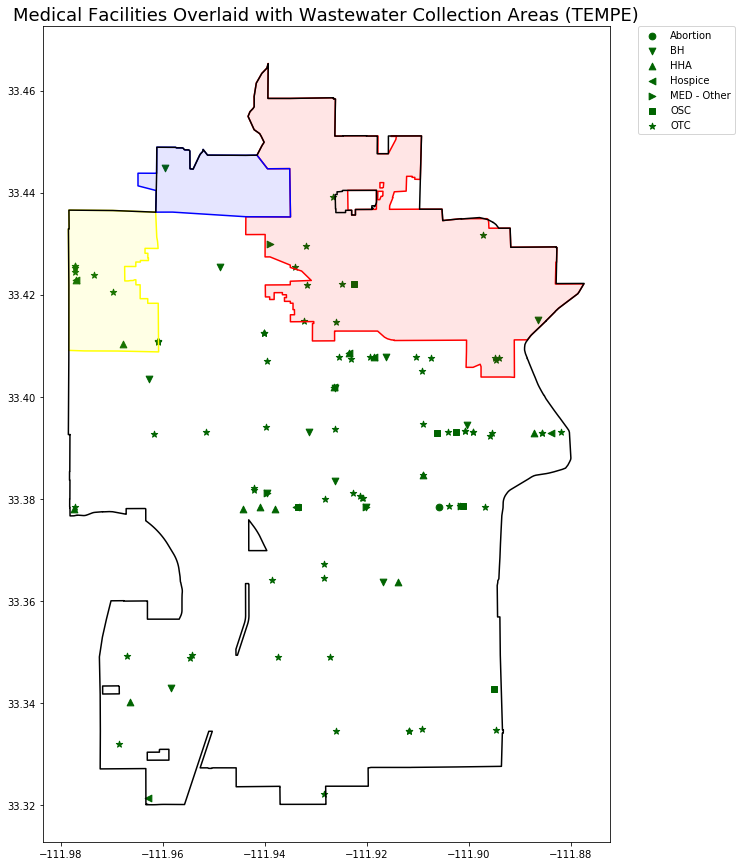

In [212]:
fig, ax = plt.subplots(figsize=(15,15))
plt.title('Medical Facilities Overlaid with Wastewater Collection Areas (TEMPE)',size=18)
for i in range(len(casesm)):
    geo_mf[geo_mf['Category']==casesm[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesm[i]),
                                             color='darkgreen')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
sa[sa['Site'] == 'TP02'].plot(ax=ax,color='red',alpha=0.1)
sa[sa['Site'] == 'TP02'].boundary.plot(ax=ax,color='red')
sa[sa['Site'] == 'TP04'].plot(ax=ax, color = 'yellow',alpha=0.1)
sa[sa['Site'] == 'TP04'].boundary.plot(ax=ax, color = 'yellow')
sa[sa['Site'] == 'TP05'].plot(ax=ax, color = 'blue',alpha=0.1)
sa[sa['Site'] == 'TP05'].boundary.plot(ax=ax, color = 'blue')
bdry.boundary.plot(ax=ax, color='black')

### DUI and/or Domestic Violence Treatment Centers

Queried JSON File from DUI and/or Domestic Violence Treatment Centers Layer found in AZLicensedFacilities (FeatureServer) Services Directory Repository
https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/AZLicensedFacilities/FeatureServer/7/query?where=P_city+%3D+%27TEMPE%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token=

In [213]:
url='https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/AZLicensedFacilities/FeatureServer/7/query?where=P_city+%3D+%27TEMPE%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='
resp = requests.get(url)
print(resp)

data_raw = resp.json()
data_raw.keys()

<Response [200]>


dict_keys(['objectIdFieldName', 'uniqueIdField', 'globalIdFieldName', 'geometryType', 'spatialReference', 'fields', 'features'])

In [214]:
data_raw['features']
dui_data = pd.io.json.json_normalize(data_raw['features'])
dui_data.head()

#print(mf_data.columns)

desired_cols = ['attributes.Name','attributes.TYPE',
               'attributes.SUBTYPE','attributes.Icon_Category',
               'attributes.Capacity','attributes.P_city',
               'attributes.P_zip','attributes.N_LAT',
               'attributes.N_LON']

dui_df = dui_data[desired_cols]

dui_df.columns =['Name','Type','Subtype','Category','Capacity','City',
                'Zip','Lat','Lon']
dui_df.head()

,Name,Type,Subtype,Category,Capacity,City,Zip,Lat,Lon
0,"RECOVERY OASIS, LLC",SL-Court Ordered Services,DUI/DVTX,MED - Other,0,TEMPE,85282,33.407703,-111.920621
1,CONFIDENTIAL COUNSELING & CONSULTING LLC,SL-Court Ordered Services,DUI/DVTX,MED - Other,0,TEMPE,85282,33.381618,-111.924170
2,RECLAIM U COUNSELING,SL-Court Ordered Services,DUI/DVTX,MED - Other,0,TEMPE,85283,33.378312,-111.896908
3,CONFIDENTIAL COUNSELING & CONSULTING LLC,SL-Court Ordered Services,DUI/DVTX,MED - Other,0,TEMPE,85282,33.381618,-111.924170


In [215]:
tempe_dui = pd.DataFrame(dui_df)

geometry = [Point(xy) for xy in zip(tempe_dui['Lon'],tempe_dui['Lat'])]


geo_dui = gpd.GeoDataFrame(tempe_dui, crs = crs, geometry = geometry)
geo_dui.head()

,Name,Type,Subtype,Category,Capacity,City,Zip,Lat,Lon,geometry
0,"RECOVERY OASIS, LLC",SL-Court Ordered Services,DUI/DVTX,MED - Other,0,TEMPE,85282,33.407703,-111.920621,POINT (-111.92062 33.40770)
1,CONFIDENTIAL COUNSELING & CONSULTING LLC,SL-Court Ordered Services,DUI/DVTX,MED - Other,0,TEMPE,85282,33.381618,-111.924170,POINT (-111.92417 33.38162)
2,RECLAIM U COUNSELING,SL-Court Ordered Services,DUI/DVTX,MED - Other,0,TEMPE,85283,33.378312,-111.896908,POINT (-111.89691 33.37831)
3,CONFIDENTIAL COUNSELING & CONSULTING LLC,SL-Court Ordered Services,DUI/DVTX,MED - Other,0,TEMPE,85282,33.381618,-111.924170,POINT (-111.92417 33.38162)


In [188]:
with open('dui_domesticviolencetreatTempe.pkl', 'wb') as pkl_file:
    pkl.dump(geo_dui, pkl_file)

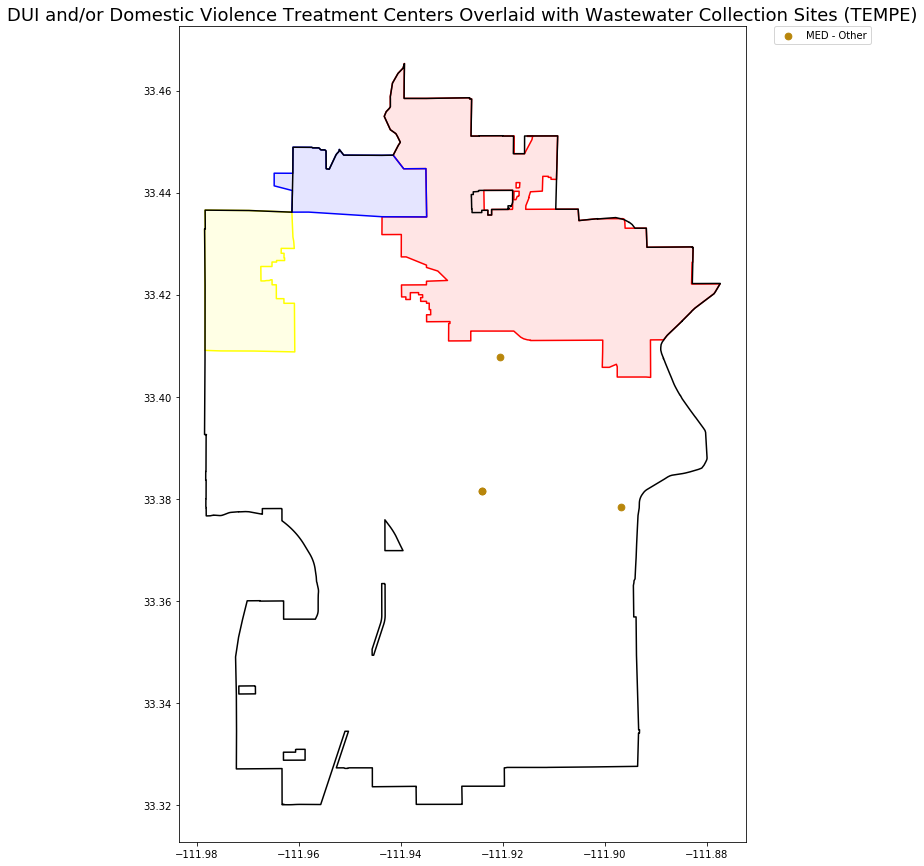

In [216]:
casesd = list(dui_df['Category'])
casesd = list(np.unique(casesd))

fig, ax = plt.subplots(figsize=(15,15))
plt.title('DUI and/or Domestic Violence Treatment Centers Overlaid with Wastewater Collection Sites (TEMPE)', size = 18)
for i in range(len(casesd)):
    geo_dui[geo_dui['Category']==casesd[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesd[i]),
                                             color='darkgoldenrod')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
sa[sa['Site'] == 'TP02'].plot(ax=ax,color='red',alpha=0.1)
sa[sa['Site'] == 'TP02'].boundary.plot(ax=ax,color='red')
sa[sa['Site'] == 'TP04'].plot(ax=ax, color = 'yellow',alpha=0.1)
sa[sa['Site'] == 'TP04'].boundary.plot(ax=ax, color = 'yellow')
sa[sa['Site'] == 'TP05'].plot(ax=ax, color = 'blue',alpha=0.1)
sa[sa['Site'] == 'TP05'].boundary.plot(ax=ax, color = 'blue')
bdry.boundary.plot(ax=ax, color='black')

In [217]:
facilities = pd.concat([geo_h,geo_lt,geo_mf,geo_dui],axis=0,
                       ignore_index=True,sort=False)
facilities.head()

,Name,Type,Subtype,Category,Capacity,City,Zip,Lat,Lon,geometry
0,"TEMPE ST LUKE'S HOSPITAL, A CAMPUS OF ST LUKE'...",HOSPITAL,SHORT TERM,HOSPITAL,74,TEMPE,85281,33.412378,-111.940084,POINT (-111.94008 33.41238)
1,AURORA BEHAVIORAL HEALTHCARE-TEMPE,HOSPITAL,PSYCHIATRIC,HOSPITAL,138,TEMPE,85283,33.364115,-111.938600,POINT (-111.93860 33.36411)
2,FRIENDSHIP VILLAGE OF TEMPE,NURSING HOME (NH),SNF ONLY,NH,128,TEMPE,85282,33.392861,-111.883972,POINT (-111.88397 33.39286)
3,WESTCHESTER CARE CENTER,NURSING HOME (NH),SNF/NF DUAL CERT,NH,56,TEMPE,85283,33.367241,-111.928773,POINT (-111.92877 33.36724)
4,HEALTH AT HOME,HOME HEALTH AGENCY (HHA),MEDICARE,HHA,0,TEMPE,85282,33.392852,-111.887248,POINT (-111.88725 33.39285)


### Map of all the Health Centers in Tempe

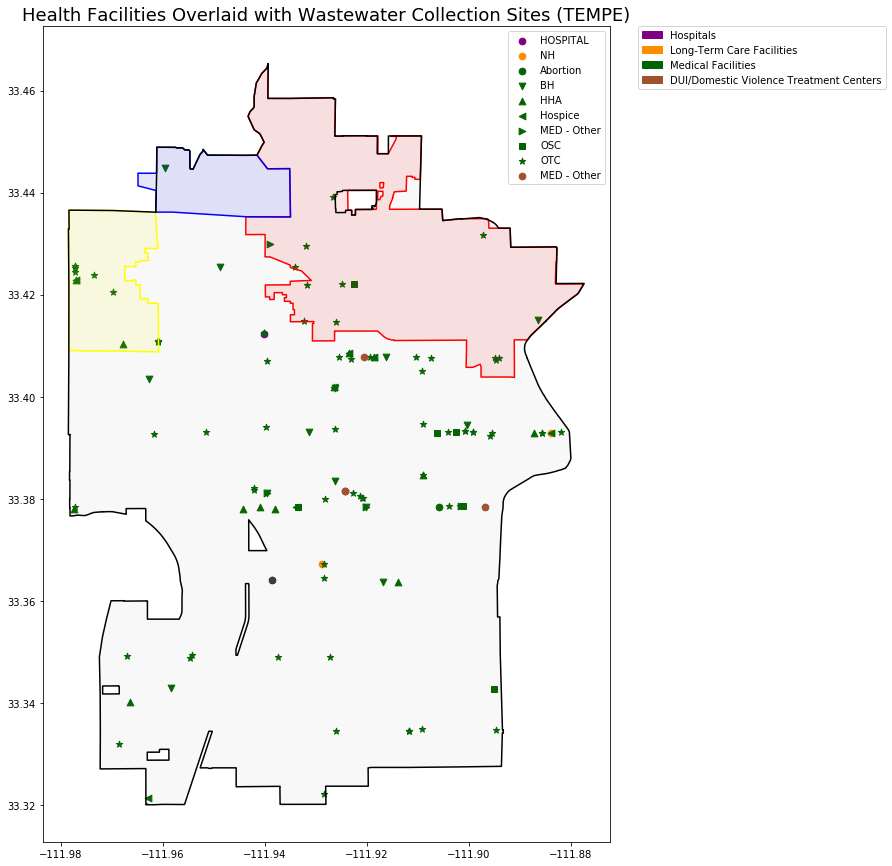

In [218]:
types = ['Hospital','Long-Term Care','Medical Facility','DUI/Domestic Violence']
colors = ['purple','darkorange','darkgreen','darkgoldenrod']

import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Health Facilities Overlaid with Wastewater Collection Sites (TEMPE)', size = 18)

for i in range(len(casesh)):
    geo_h[geo_h['Category']==casesh[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesh[i]),
                                             color='purple')

for i in range(len(casesl)):
    geo_lt[geo_lt['Category']==casesl[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesl[i]),
                                             color='darkorange')
                                             
for i in range(len(casesm)):
    geo_mf[geo_mf['Category']==casesm[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesm[i]),
                                             color='darkgreen')

    
for i in range(len(casesd)):
    geo_dui[geo_dui['Category']==casesd[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesd[i]),
                                             color='sienna')

leg1 = ax.legend(loc='upper right')

#colors for color legend
h = mpatches.Patch(color='purple',label='Hospitals')
lt = mpatches.Patch(color='darkorange',label = 'Long-Term Care Facilities')
mf = mpatches.Patch(color='darkgreen',label = 'Medical Facilities')
dui = mpatches.Patch(color = 'sienna',label = 'DUI/Domestic Violence Treatment Centers')
l2 = plt.legend(handles=[h,lt,mf,dui],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.add_artist(leg1)


sa[sa['Site'] == 'TP02'].plot(ax=ax,color='red',alpha=0.1)
sa[sa['Site'] == 'TP02'].boundary.plot(ax=ax,color='red')
sa[sa['Site'] == 'TP04'].plot(ax=ax, color = 'yellow',alpha=0.1)
sa[sa['Site'] == 'TP04'].boundary.plot(ax=ax, color = 'yellow')
sa[sa['Site'] == 'TP05'].plot(ax=ax, color = 'blue',alpha=0.1)
sa[sa['Site'] == 'TP05'].boundary.plot(ax=ax, color = 'blue')
bdry.boundary.plot(ax=ax, color='black')
bdry.plot(ax=ax, color='grey',alpha=0.05)

## Pharmacies

The purpose of this dataset is to spatially represent all of the open pharmacies within Arizona that have been granted a permit from the Arizona State Board of Pharmacy.
https://www.arcgis.com/home/item.html?id=d4953b59217c4a80b1f88ab49d01f3cf#overview

Queried JSON from Pharmacies FeatureServer: 

https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/Pharmacies/FeatureServer/0/query?where=N_CITY+%3D+%27TEMPE%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=html&token=

In [219]:
url='https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/Pharmacies/FeatureServer/0/query?where=N_CITY+%3D+%27TEMPE%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='
resp = requests.get(url)
print(resp)

data_raw = resp.json()
data_raw.keys()

data_raw['features']
p_data = pd.io.json.json_normalize(data_raw['features'])
p_data.head()


<Response [200]>


,attributes.Apt,attributes.Business_N,attributes.City,attributes.County,attributes.Expiration,attributes.Fax,attributes.IncidentID,attributes.Issue_Date,attributes.LicenseP_1,attributes.LicenseP_2,...,attributes.Phone,attributes.RESERVATIO,attributes.RESERV_ID,attributes.R_Method,attributes.State,attributes.Status,attributes.Street_Add,attributes.SubType_,attributes.Type_,attributes.Zip
0,,Walgreens Drug #01197,Tempe,Maricopa,2020-10-31 00:00:00.0000000,(480) 838-5783,fY000878,1966-11-07 00:00:00.0000000,-45.035955,81.106218,...,(480) 838-3642,,,,AZ,OPEN,1745 E. Southern Ave.,Chain,Pharmacy,85282
1,,Walgreens Drug #03768,Tempe,Maricopa,2020-10-31 00:00:00.0000000,480-838-7215,fY001094,1972-04-02 00:00:00.0000000,-45.003806,81.101262,...,480-838-9200,,,,AZ,OPEN,6404 S McClintock Drive,Chain,Pharmacy,85283
2,,Bashas' United Drug #048,Tempe,Maricopa,2020-10-31 00:00:00.0000000,480-897-2964,fY002528,1993-06-02 00:00:00.0000000,-45.021535,81.104016,...,480-897-2980,,,,AZ,OPEN,1761 E. Warner Rd,Chain,Pharmacy,85284
3,,Costco Pharmacy #436,Tempe,Maricopa,2020-10-31 00:00:00.0000000,(480) 894-6640,fY002658,1994-12-02 00:00:00.0000000,-45.026860,81.104839,...,(480) 893-9027,,,,AZ,OPEN,1445 W. Elliot Road,Chain,Pharmacy,85284
4,,Patient Care Infusion Pharmacy,Tempe,Maricopa,2019-10-31 00:00:00.0000000,(602) 323-5070,fY002667,1995-02-01 00:00:00.0000000,-45.027229,81.104896,...,(602) 252-5000,,,,AZ,OPEN,1626 S. Edward Dr.,Limited Service,Pharmacy,85281


In [220]:
#print(p_data.columns)

desired_cols = ['attributes.Business_N','attributes.Type_',
               'attributes.SubType_',
               'attributes.City',
               'attributes.N_ZIP','attributes.N_LAT',
               'attributes.N_LON']

p_df = p_data[desired_cols]

p_df.columns =['Name','Type','Subtype','City',
                'Zip','Lat','Lon']

In [221]:
tempe_p = pd.DataFrame(p_df)

geometry = [Point(xy) for xy in zip(tempe_p['Lon'],tempe_p['Lat'])]


geo_p = gpd.GeoDataFrame(tempe_p, crs = crs, geometry = geometry)
geo_p.head()

,Name,Type,Subtype,City,Zip,Lat,Lon,geometry
0,Walgreens Drug #01197,Pharmacy,Chain,Tempe,85282,33.392813,-111.910238,POINT (-111.91024 33.39281)
1,Walgreens Drug #03768,Pharmacy,Chain,Tempe,85283,33.363105,-111.911377,POINT (-111.91138 33.36310)
2,Bashas' United Drug #048,Pharmacy,Chain,Tempe,85284,33.334493,-111.911670,POINT (-111.91167 33.33449)
3,Costco Pharmacy #436,Pharmacy,Chain,Tempe,85284,33.348888,-111.962066,POINT (-111.96207 33.34889)
4,Patient Care Infusion Pharmacy,Pharmacy,Limited Service,Tempe,85281,33.410282,-111.967740,POINT (-111.96774 33.41028)


In [189]:
with open('pharmaciesTempe.pkl', 'wb') as pkl_file:
    pkl.dump(geo_p, pkl_file)

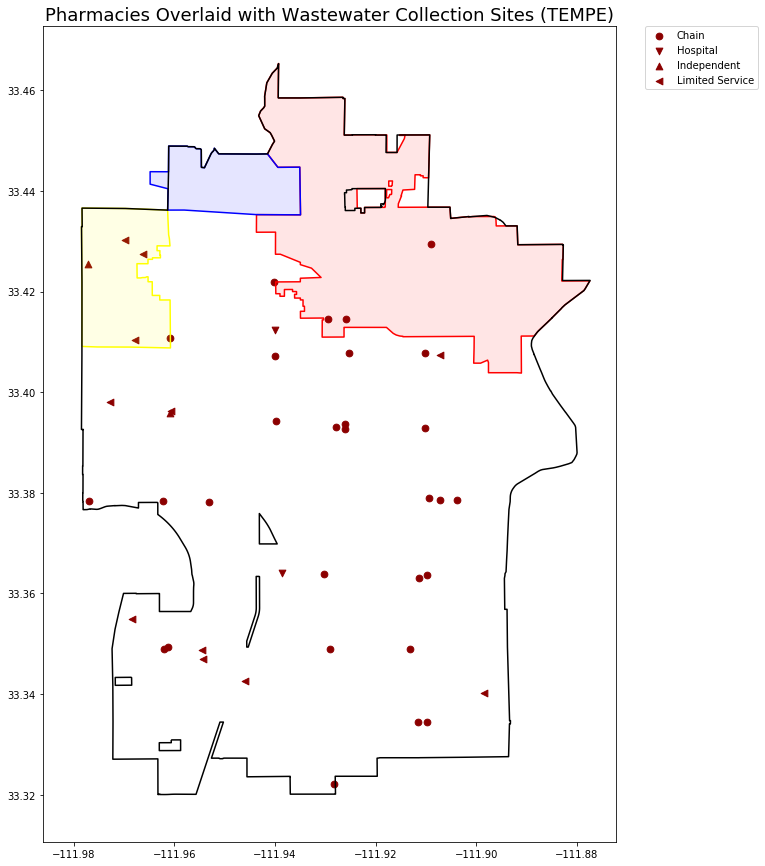

In [222]:
casesp = list(p_df['Subtype'])
casesp = list(np.unique(casesp))

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Pharmacies Overlaid with Wastewater Collection Sites (TEMPE)', size = 18)
for i in range(len(casesp)):
    geo_p[geo_p['Subtype']==casesp[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesp[i]),
                                             color='darkred')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
sa[sa['Site'] == 'TP02'].plot(ax=ax,color='red',alpha=0.1)
sa[sa['Site'] == 'TP02'].boundary.plot(ax=ax,color='red')
sa[sa['Site'] == 'TP04'].plot(ax=ax, color = 'yellow',alpha=0.1)
sa[sa['Site'] == 'TP04'].boundary.plot(ax=ax, color = 'yellow')
sa[sa['Site'] == 'TP05'].plot(ax=ax, color = 'blue',alpha=0.1)
sa[sa['Site'] == 'TP05'].boundary.plot(ax=ax, color = 'blue')
bdry.boundary.plot(ax=ax, color='black')

In [168]:
geo_p.to_csv(r'pharmaciesTempe.csv')

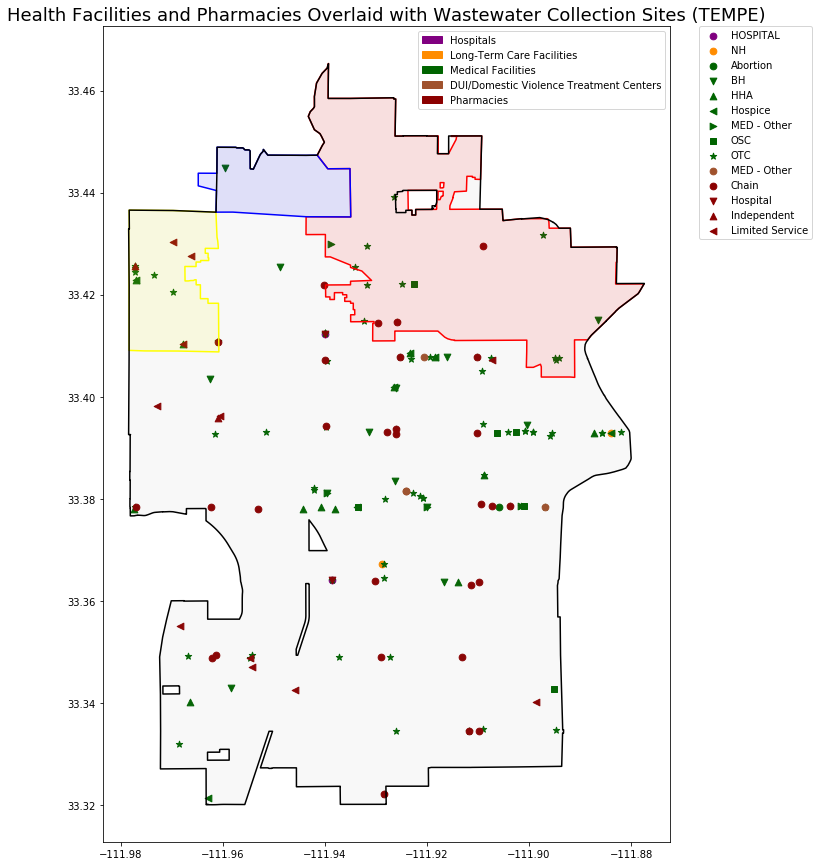

In [231]:
fig, ax = plt.subplots(figsize=(15,15))
plt.title('Health Facilities and Pharmacies Overlaid with Wastewater Collection Sites (TEMPE)', size = 18)

for i in range(len(casesh)):
    geo_h[geo_h['Category']==casesh[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesh[i]),
                                             color='purple')

for i in range(len(casesl)):
    geo_lt[geo_lt['Category']==casesl[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesl[i]),
                                             color='darkorange')
                                             
for i in range(len(casesm)):
    geo_mf[geo_mf['Category']==casesm[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesm[i]),
                                             color='darkgreen')

    
for i in range(len(casesd)):
    geo_dui[geo_dui['Category']==casesd[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesd[i]),
                                             color='sienna')

for i in range(len(casesp)):
    geo_p[geo_p['Subtype']==casesp[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesp[i]),
                                             color='darkred')

leg1 = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#colors for color legend
h = mpatches.Patch(color='purple',label='Hospitals')
lt = mpatches.Patch(color='darkorange',label = 'Long-Term Care Facilities')
mf = mpatches.Patch(color='darkgreen',label = 'Medical Facilities')
dui = mpatches.Patch(color = 'sienna',label = 'DUI/Domestic Violence Treatment Centers')
p = mpatches.Patch(color='darkred',label = 'Pharmacies')
l2 = plt.legend(handles=[h,lt,mf,dui,p],loc='upper right')

ax.add_artist(leg1)


sa[sa['Site'] == 'TP02'].plot(ax=ax,color='red',alpha=0.1)
sa[sa['Site'] == 'TP02'].boundary.plot(ax=ax,color='red')
sa[sa['Site'] == 'TP04'].plot(ax=ax, color = 'yellow',alpha=0.1)
sa[sa['Site'] == 'TP04'].boundary.plot(ax=ax, color = 'yellow')
sa[sa['Site'] == 'TP05'].plot(ax=ax, color = 'blue',alpha=0.1)
sa[sa['Site'] == 'TP05'].boundary.plot(ax=ax, color = 'blue')
bdry.boundary.plot(ax=ax, color='black')
bdry.plot(ax=ax, color='grey',alpha=0.05)

plt.savefig('HealthFacilitiesPharmaciesMap.png')

## Drug Drop off Locations
Shows prescription drug drop off locations in Arizona as of 04/16/2019
https://www.arcgis.com/home/item.html?id=a7cf6cf94a604c1e81eaf7e5652fb7b6#overview

Service Directory:
https://services1.arcgis.com/mpVYz37anSdrK4d8/ArcGIS/rest/services/DrugDropOffLocations/FeatureServer

Queired JSON:
https://services1.arcgis.com/mpVYz37anSdrK4d8/arcgis/rest/services/DrugDropOffLocations/FeatureServer/0/query?where=N_CITY+%3D+%27TEMPE%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token=

In [224]:
url = 'https://services1.arcgis.com/mpVYz37anSdrK4d8/arcgis/rest/services/DrugDropOffLocations/FeatureServer/0/query?where=N_CITY+%3D+%27TEMPE%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token='
resp = requests.get(url)
print(resp)

data_raw = resp.json()
data_raw.keys()

data_raw['features']
dd_data = pd.io.json.json_normalize(data_raw['features'])
dd_data.head()

<Response [200]>


,attributes.Address,attributes.City,attributes.County,attributes.Drop_Box_A,attributes.Drop_Box_L,attributes.FID_,attributes.IncidentID,attributes.Location,attributes.N_ADDR2,attributes.N_ADDRESS,...,attributes.OBJECTID,attributes.OBJECTID_1,attributes.OBJECTID_12,attributes.PCA,attributes.PCA_ID,attributes.P_Method,attributes.P_Reliable,attributes.Phone,attributes.State,attributes.Zip
0,120 E. 5th Street,Tempe,Maricopa,Mon - Fri 8 AM - 5 PM,Lobby,69,f69,Tempe Police Department,,120 E 5TH ST,...,69,148,148,TEMPE NORTH,71,Coordinates,,480-350-8311,AZ,85281
1,1855 E. Apache Blvd.,Tempe,Maricopa,Mon - Fri 8 AM - 5 PM \n(Excluding Holidays),Lobby,70,f70,Tempe Police Department,,1855 E APACHE BLVD,...,70,150,150,TEMPE NORTH,71,Coordinates,,480-350-8311,AZ,85281
2,1745 E. Southern Ave.,Tempe,Maricopa,24 Hours,Pharmacy,72,f72,Walgreens #1197,,1745 E SOUTHERN AVE,...,72,152,152,TEMPE NORTH,71,Coordinates,,480-838-3642,AZ,85282
3,325 East Apache Blvd.,Tempe,Maricopa,Mon - Fri 8 AM - 5 PM,Lobby,83,f83,ASU Police,,325 E APACHE BLVD,...,83,164,164,TEMPE NORTH,71,Coordinates,,480-965-3456,AZ,85281


In [225]:
dd_data.columns
desired_cols = ['attributes.Location',
               'attributes.N_CITY',
               'attributes.N_ZIP','attributes.N_LAT',
               'attributes.N_LON']

dd_df = dd_data[desired_cols]

dd_df.columns =['Location','City',
                'Zip','Lat','Lon']

In [226]:
tempe_dd = pd.DataFrame(dd_df)

geometry = [Point(xy) for xy in zip(tempe_dd['Lon'],tempe_dd['Lat'])]


geo_dd = gpd.GeoDataFrame(tempe_dd, crs = crs, geometry = geometry)
geo_dd.head()

,Location,City,Zip,Lat,Lon,geometry
0,Tempe Police Department,TEMPE,85281,33.425654,-111.937831,POINT (-111.93783 33.42565)
1,Tempe Police Department,TEMPE,85281,33.414566,-111.905799,POINT (-111.90580 33.41457)
2,Walgreens #1197,TEMPE,85282,33.392813,-111.910286,POINT (-111.91029 33.39281)
3,ASU Police,TEMPE,85281,33.414499,-111.933050,POINT (-111.93305 33.41450)


In [195]:
with open('drugdropTempe.pkl', 'wb') as pkl_file:
    pkl.dump(geo_dd, pkl_file)
geo_dd.to_csv(r'drugdropTempe.csv')

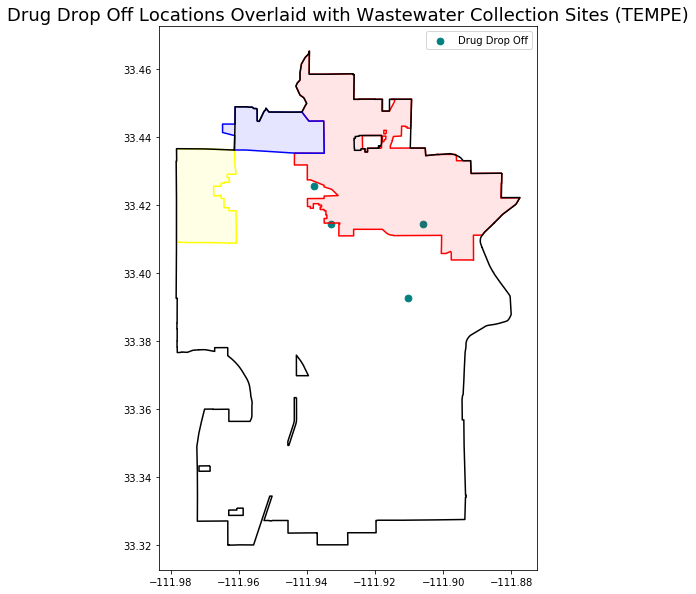

In [227]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Drug Drop Off Locations Overlaid with Wastewater Collection Sites (TEMPE)', size = 18)

geo_dd.plot(ax=ax,markersize=45, label="Drug Drop Off",color='teal')
ax.legend(loc='upper right')
sa[sa['Site'] == 'TP02'].plot(ax=ax,color='red',alpha=0.1)
sa[sa['Site'] == 'TP02'].boundary.plot(ax=ax,color='red')
sa[sa['Site'] == 'TP04'].plot(ax=ax, color = 'yellow',alpha=0.1)
sa[sa['Site'] == 'TP04'].boundary.plot(ax=ax, color = 'yellow')
sa[sa['Site'] == 'TP05'].plot(ax=ax, color = 'blue',alpha=0.1)
sa[sa['Site'] == 'TP05'].boundary.plot(ax=ax, color = 'blue')
bdry.boundary.plot(ax=ax, color='black')

# All Health Facilities, Pharmacies, and Drug Drop Off Locations in Tempe, AZ

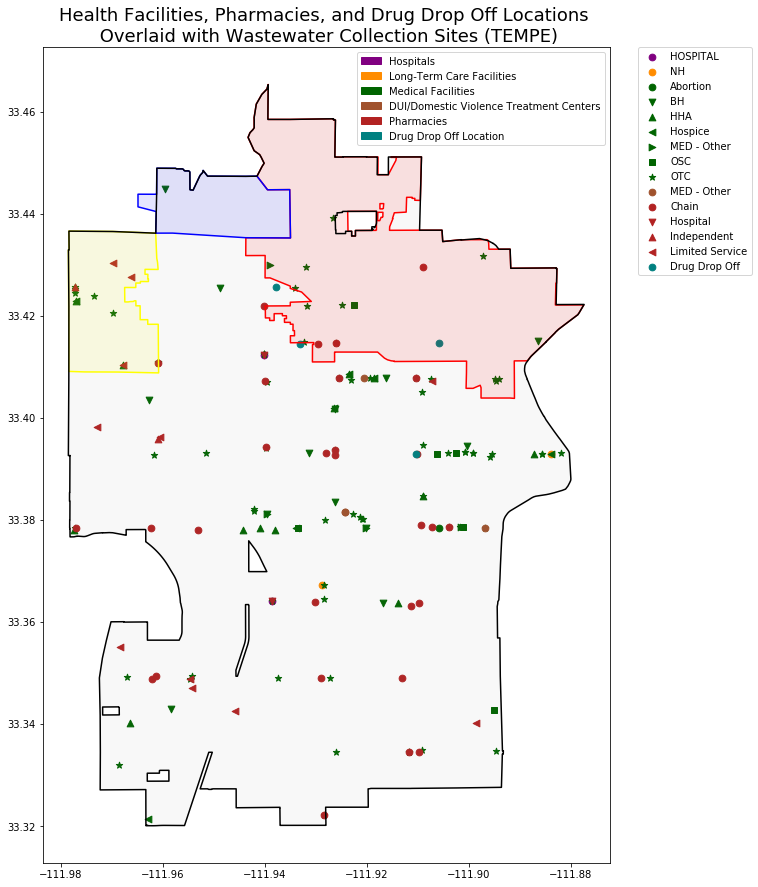

In [230]:
fig, ax = plt.subplots(figsize=(15,15))
plt.title('Health Facilities, Pharmacies, and Drug Drop Off Locations \n Overlaid with Wastewater Collection Sites (TEMPE)', size = 18)

for i in range(len(casesh)):
    geo_h[geo_h['Category']==casesh[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesh[i]),
                                             color='purple')

for i in range(len(casesl)):
    geo_lt[geo_lt['Category']==casesl[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesl[i]),
                                             color='darkorange')
                                             
for i in range(len(casesm)):
    geo_mf[geo_mf['Category']==casesm[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesm[i]),
                                             color='darkgreen')

    
for i in range(len(casesd)):
    geo_dui[geo_dui['Category']==casesd[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesd[i]),
                                             color='sienna')

for i in range(len(casesp)):
    geo_p[geo_p['Subtype']==casesp[i]].plot(ax=ax, marker=markers[i],markersize=45, label=str(casesp[i]),
                                             color='firebrick')

geo_dd.plot(ax=ax,markersize=45, label="Drug Drop Off",color='teal')

leg1 = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#colors for color legend
h = mpatches.Patch(color='purple',label='Hospitals')
lt = mpatches.Patch(color='darkorange',label = 'Long-Term Care Facilities')
mf = mpatches.Patch(color='darkgreen',label = 'Medical Facilities')
dui = mpatches.Patch(color = 'sienna',label = 'DUI/Domestic Violence Treatment Centers')
p = mpatches.Patch(color='firebrick',label = 'Pharmacies')
dd = mpatches.Patch(color='teal',label = 'Drug Drop Off Location')
l2 = plt.legend(handles=[h,lt,mf,dui,p,dd],loc='upper right')

ax.add_artist(leg1)


sa[sa['Site'] == 'TP02'].plot(ax=ax,color='red',alpha=0.1)
sa[sa['Site'] == 'TP02'].boundary.plot(ax=ax,color='red')
sa[sa['Site'] == 'TP04'].plot(ax=ax, color = 'yellow',alpha=0.1)
sa[sa['Site'] == 'TP04'].boundary.plot(ax=ax, color = 'yellow')
sa[sa['Site'] == 'TP05'].plot(ax=ax, color = 'blue',alpha=0.1)
sa[sa['Site'] == 'TP05'].boundary.plot(ax=ax, color = 'blue')
bdry.boundary.plot(ax=ax, color='black')
bdry.plot(ax=ax, color='grey',alpha=0.05)

plt.savefig('HealthFacilitiesPharmaciesDrugDropMap.png')